<a href="https://colab.research.google.com/github/LeeJuCheon/Dacon_practice/blob/master/210927_Colabtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 보기
import pandas as pd
import numpy as np
from glob import glob

# 이미지데이터 로딩
from PIL import Image
import cv2
from tqdm import tqdm


# 파일경로 설정
import os
import json

# Others
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Koroad/go_traffic_file'


train_path = data_path + '/train'
#test_path = data_path + '/test'

new_image_directory = data_path + '/new_images'
new_train_image_directory = new_image_directory + '/train'
#new_test_image_directory = new_image_directory + '/test'

action_information = pd.read_csv(data_path + '/action_information.csv')
#sample_submission = pd.read_csv(data_path + '/sample_submission.csv')

In [ ]:
def make_new_dir(path) : 
    if os.path.isdir(path) == False:
        os.makedirs(path)

In [ ]:
make_new_dir(new_image_directory)
make_new_dir(new_train_image_directory)
#make_new_dir(new_test_image_directory)

In [ ]:
action_information.head()

,action,Label
0,우측에서 좌측으로,0
1,전방정지,1
2,전후방 동시정지,2
3,좌우측방 동시정지,3
4,좌측에서 우측으로,4


In [ ]:
# 디렉토리 생성
make_new_dir(new_image_directory)
make_new_dir(new_train_image_directory)
# make_new_dir(new_test_image_directory)

In [ ]:
# Train 데이터에 있는 폴더를 glob로 불러와
# sorted method를 통해 숫자 순으로 정렬합니다.
train_folders = sorted(glob(train_path + '/*'), key = lambda x : int(x.split('/')[-1].replace('file_','')))
#test_folders  = sorted(glob(test_path + '/*'), key = lambda x : int(x.split('/')[-1].replace('file_','')))
train_folders[:5]

[]

In [ ]:
train_folder = train_folders[0]

image_paths = sorted(glob(train_folder + '/*.jpg'), key = lambda x : int(x.split('/')[-1].replace('.jpg','')))
json_path   = glob(train_folder + '/*.json')[0]

IndexError: ignored

In [ ]:
# 샘플 1개 이미지 출력
image_path = image_paths[0]
img = Image.open(image_path)
img_arr = np.array(img)
print(img_arr.shape)
plt.imshow(img_arr)
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
# json 데이터 확인
js = json.load(open(json_path))
print("json keys             : ", js.keys())
print("json action info       : ", js.get('action'))
print("json sequence info       : ", js.get('sequence').keys())
print("json info keys : ", js.get('info').keys())

NameError: ignored

In [ ]:
# pandas get_dummies를 활용한 명목변수 전처리
classes = pd.get_dummies(
    action_information[['Label']], columns=['Label']).to_numpy()
classes

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
image = Image.open(image_path)
bounding_box = js.get('info').get('bounding_box')  # 불필요 코드인듯

# bounding box 이미지 확대
bounding_box = js.get('sequence').get('bounding_box')[0]
bounding_box = [float(x) for x in bounding_box]  # float 자료형으로 변환, 4개의 좌표

NameError: ignored

In [ ]:
image = Image.open(image_path)
image = image.crop(bounding_box)  # left top right bottom 4개 좌표 기준 잘라내기
image = image.resize((224, 224))  # 224, 224 크기로 조절
image


NameError: ignored

In [ ]:
train_directories = np.array(sorted(
    glob(train_path + '\\*'), key=lambda x: int(x.split('\\')[-1].split('_')[-1])))

# train set Bounding box 이미지 객체 잘라내기 후 저장
for train_directory in tqdm(train_directories, total=len(train_directories)):
    file_name = train_directory.split('\\')[-1]
    make_new_dir(new_train_image_directory + '/'+file_name)

    image_paths = sorted(glob(train_directory + '\\*.jpg'),
                         key=lambda x: int(x.split('\\')[-1].replace('.jpg', '')))
    json_path = glob(train_directory + '\\*.json')[0]

    js = json.load(open(json_path))
    target = js.get('action')
    target = classes[target]
    bounding_boxes = js.get('sequence').get('bounding_box')
    bounding_boxes = [(float(a), float(b), float(c), float(
        d)) for a, b, c, d in bounding_boxes]  # 실수형태로 변환, (left, top, right, bottom)

    for image_path, bounding_box in zip(image_paths, bounding_boxes):
        image = Image.open(image_path)
        image = image.crop(bounding_box)  # left top right bottom
        image = image.resize((224, 224))
        image.save(new_train_image_directory + image_path.split('\\train')[1])

0it [00:00, ?it/s]


In [ ]:
test_directories = np.array(sorted(
    glob(test_path + '\\*'), key=lambda x: int(x.split('\\')[-1].split('_')[-1])))

for test_directory in tqdm(test_directories, total=len(test_directories)):
    file_name = test_directory.split('\\')[-1]
    make_new_dir(new_test_image_directory + '\\'+file_name)

    image_paths = sorted(glob(test_directory + '\\*.jpg'),
                         key=lambda x: int(x.split('\\')[-1].replace('.jpg', '')))
    json_path = glob(test_directory + '\\*.json')[0]

    js = json.load(open(json_path))
    target = js.get('action')
    target = classes[target]
    bounding_boxes = js.get('sequence').get('bounding_box')
    bounding_boxes = [(float(a), float(b), float(c), float(
        d)) for a, b, c, d in bounding_boxes]  # 실수형태로 변환, (left, top, right, bottom)

    for image_path, bounding_box in zip(image_paths, bounding_boxes):
        image = Image.open(image_path)
        image = image.crop(bounding_box)  # left top right bottom
        image = image.resize((224, 224))
        image.save(new_test_image_directory + image_path.split('\\test')[1])

NameError: ignored

In [ ]:
# Modeling
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16 # 모델은 가벼운 모델을 사용합니다.
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# GPU 환경 설정
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [ ]:
# 파일경로 설정
import json

# 데이터 보기
import pandas as pd
import numpy as np
from glob import glob

# 이미지데이터 로딩
from PIL import Image
import cv2
from tqdm import tqdm

# Others
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [ ]:

data_path = '/content/drive/MyDrive/Koroad/go_traffic_file'


train_path = data_path + '/train'
test_path = data_path + '/test'

new_image_directory = data_path + '/new_images'
new_train_image_directory = new_image_directory + '/train'
new_test_image_directory = new_image_directory + '/test'

action_information = pd.read_csv(data_path + '/action_information.csv')
#sample_submission = pd.read_csv(data_path + '/sample_submission.csv')


In [ ]:
# 잘라낸 image 정렬
new_train_image_directories = sorted(glob(
    new_train_image_directory + '\\*'), key=lambda x: int(x.split('\\')[-1].split('_')[-1]))
new_train_image_directories[:5]

[]

In [ ]:
# train labeling
train_answer = []
train_image_directories = sorted(
    glob(train_path + '\\*'), key=lambda x: int(x.split('_')[-1]))
for train_image_directory in train_image_directories:
    json_path = glob(train_image_directory + '\\*.json')[0]
    js = json.load(open(json_path))
    action = js.get('action')
    train_answer.append(action)

In [ ]:
images = []
targets = []
stratify = []
for num, (new_train_image_directory, action) in tqdm(enumerate(zip(new_train_image_directories, train_answer)), total=len(new_train_image_directories)):

    image_paths = sorted(glob(new_train_image_directory + '\\*'),
                         key=lambda x: int(x.split('\\')[-1].replace('.jpg', '')))
    image_len = len(image_paths)

    for image_path in image_paths:
        img = load_img(image_path, target_size=(224, 224, 3))
        img = img_to_array(img)
        img = img/255
        images.append(img)
        targets.append(classes[action])
        stratify.append(action)

images = np.array(images)
targets = np.array(targets)

0it [00:00, ?it/s]


In [ ]:
print(images.shape)
print(targets.shape)


(0,)
(0,)


In [ ]:
train_idx, valid_idx = train_test_split(
    range(images.shape[0]), test_size=0.2, stratify=stratify)

X_train = images[train_idx]
y_train = targets[train_idx]

X_valid = images[valid_idx]
y_valid = targets[valid_idx]

print('X_train shape : ', X_train.shape)
print('X_valid shape : ', X_valid.shape)
print('y_train shape : ', y_train.shape)
print('y_valid shape : ', y_valid.shape)

ValueError: ignored

In [ ]:
baseModel = VGG16(input_shape=(224, 224, 3),
                  weights='imagenet', include_top=False, )
baseModel.trainable = False

model_in = Input(shape=(224, 224, 3))
base_model = baseModel(model_in)
head_model = MaxPooling2D(pool_size=(7, 7))(base_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(32, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(8, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)

model_out = Dense(classes.shape[1], activation="softmax")(head_model)

model = Model(inputs=model_in, outputs=model_out)

model.compile(loss='categorical_crossentropy',
              optimizer='Adam', metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tf.config.set_soft_device_placement(True)
history = model.fit(
            X_train, y_train, 
            validation_data = (X_valid,y_valid),
            verbose = 1,
            batch_size = 512,
            epochs=20,
                   )

NameError: ignored

# 새 섹션

NameError: ignored

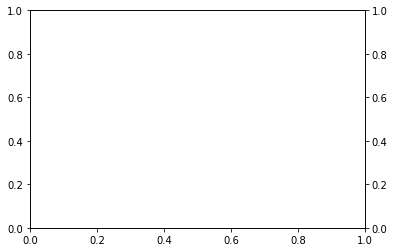

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
new_test_image_directory = new_image_directory + '\\test'
new_test_image_directories = sorted(
    glob(new_test_image_directory + '\\*'), key=lambda x: int(x.split('file_')[-1]))

predictions = []
for new_test_image_directory in tqdm(new_test_image_directories, total=len(new_test_image_directories)):
    image_paths = sorted(glob(new_test_image_directory + '\\*.jpg'),
                         key=lambda x: int(x.split('\\')[-1].replace('.jpg', '')))
    image_len = len(image_paths)
    test_images = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=(224, 224, 3))
        img = image.img_to_array(img)
        img = img/255
        test_images.append(img)
    prediction = np.mean(model.predict(np.array(test_images)), axis=0)
    predictions.append(prediction)

0it [00:00, ?it/s]
